In [7]:
!pip install keras


  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)


In [8]:
!pip install tensorflow

  Using cached tensorflow-2.6.0-cp38-cp38-win_amd64.whl (423.2 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.40.0-cp38-cp38-win_amd64.whl (3.2 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Attempting uninstall: h5py
    Found existing i

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda


In [21]:
df=pd.read_csv("forestfires.csv")

In [22]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [23]:
df["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [24]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [25]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

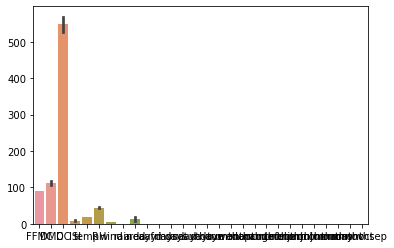

In [26]:

sns.barplot(data=df)

(array([[517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [268., 209.,  40.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 86.,   3.,  15.,  25.,  27.,  91., 219.,  51.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,

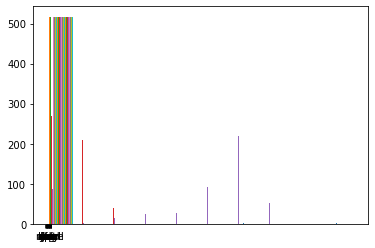

In [29]:
plt.hist(df)

In [30]:
df['size_category']=pd.get_dummies(df['size_category'])

In [31]:
df['size_category'].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [32]:
def norm_data(i):
    x =((i- i.min())/(i.max()-i.min()))
    return x
normalized_data =norm_data(df.iloc[:,2:-1])

In [33]:
normalized_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
X=normalized_data
y=df['size_category']

In [35]:

X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [36]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: size_category, dtype: uint8

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.3,random_state =42)

In [39]:
n_features =X.shape[1]
n_features

28

In [40]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((361, 28), (156, 28), (361,), (156,))

In [42]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop


In [43]:
optmizer =RMSprop(0.001)#0.01 is a learning rate
model =keras.Sequential([
    keras.layers.Dense(12,input_dim =28,activation='relu'),
    keras.layers.Dense(50,activation ='sigmoid'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer =optmizer,loss= 'binary_crossentropy',metrics =['accuracy'])

In [44]:
seed_val =42
import random
random.seed(seed_val)
tensorflow.random.set_seed(seed_val)

In [45]:
model.fit(X_train,y_train,epochs =10)

Epoch 1/10
12/12 [==============================] - 1s 2ms/step - loss: 0.7780 - accuracy: 0.2881
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.7008
Epoch 3/10
12/12 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.7285
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.7285
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.7285
Epoch 6/10
12/12 [==============================] - 0s 1ms/step - loss: 0.5861 - accuracy: 0.7285
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.7285
Epoch 8/10
12/12 [==============================] - 0s 1ms/step - loss: 0.5839 - accuracy: 0.7285
Epoch 9/10
12/12 [==============================] - 0s 1ms/step - loss: 0.5825 - accuracy: 0.7285
Epoch 10/10
12/12 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7285


In [46]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.7372


[0.5753139853477478, 0.7371794581413269]

In [47]:
y_pred = model.predict(X_test)

In [48]:

y_pred[25]

array([0.24694985], dtype=float32)

In [49]:

y_pred

array([[0.2899711 ],
       [0.26298517],
       [0.25823867],
       [0.27604887],
       [0.24048045],
       [0.26384085],
       [0.25924325],
       [0.25529093],
       [0.2761281 ],
       [0.2552548 ],
       [0.25876832],
       [0.28372675],
       [0.25973436],
       [0.2724355 ],
       [0.2758567 ],
       [0.30821526],
       [0.26937732],
       [0.27596736],
       [0.2597552 ],
       [0.25597364],
       [0.26373285],
       [0.28882694],
       [0.3101679 ],
       [0.27703202],
       [0.2749108 ],
       [0.24694985],
       [0.29542333],
       [0.24975282],
       [0.2779277 ],
       [0.30726013],
       [0.25605035],
       [0.27829874],
       [0.27743918],
       [0.27587408],
       [0.26508832],
       [0.24765107],
       [0.25837374],
       [0.29134172],
       [0.26948673],
       [0.26610714],
       [0.2759432 ],
       [0.27664044],
       [0.27011567],
       [0.29377824],
       [0.26439613],
       [0.25945917],
       [0.2715538 ],
       [0.259